__Logistic Regression__ is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

# Logistic Regression Assumptions

1. Binary logistic regression requires the dependent variable to be binary.
2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
3. Only the meaningful variables should be included.
4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
5. The independent variables are linearly related to the log odds.
6. Logistic regression requires quite large sample sizes.

Keeping the above assumptions in mind, let’s look at our dataset.

# Data

The data comes from listed US corporates and consists of five ratios from the widely known Z-score developed by Altman (1968). 
WC/TA captures the short-term liquidity of a firm, RE/TA and EBIT/TA measure historic and current profitability, respectively. S/TA further proxies for the competitive situation of the company and ME/TL is a market-based measure of leverage. The classification goal is to predict whether a firm will default (1/0) (variable y)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('US_Corporate_Default.csv')
print(data.shape)
print(list(data.columns))

(21553, 7)
['Firm ID', 'WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA', 'y']


In [3]:
data.head(40)

,Firm ID,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA,y
0,1,0.50,0.31,0.04,0.96,0.33,0
1,2,0.55,0.32,0.05,1.06,0.33,0
2,3,0.45,0.23,0.03,0.80,0.25,0
3,4,0.31,0.19,0.03,0.39,0.25,0
4,5,0.45,0.22,0.03,0.79,0.28,0
5,6,0.46,0.22,0.03,1.29,0.32,0
6,7,0.01,-0.03,0.01,0.11,0.25,0
7,8,-0.11,-0.12,0.03,0.15,0.32,0
8,9,0.06,-0.11,0.04,0.41,0.29,0
9,10,0.05,-0.09,0.05,0.25,0.34,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21553 entries, 0 to 21552
Data columns (total 7 columns):
Firm ID    21553 non-null int64
WC/TA      21553 non-null float64
RE/TA      21553 non-null float64
EBIT/TA    21553 non-null float64
ME/TL      21553 non-null float64
S/TA       21553 non-null float64
y          21553 non-null int64
dtypes: float64(5), int64(2)
memory usage: 1.2 MB


#### Input variables

1 - CorporateID (numeric)

2 - WC/TA: Working Capital (WC) divided by Total Assets (TA). All of these items are found in the balance
sheet of the company(numeric)

3 - RE/TA: Retained Earnings (RE) divided by Total Assets (TA). All of these items are found in the balance
sheet of the company(numeric)

4 - EBIT/TA: Earnings before interest and taxes (EBIT) divided by Total Assets (TA). All of these items are found in the balance sheet and income statement of the company(numeric)

5 - ME/TL: Market Value of Equity (ME) divided by Total Liabilities (TL). Total Liabilities is found in the balance
sheet of the company. The market value is given by the number of shares outstanding multiplied by the stock price. (numeric)

6 - Sales/TA: Sales (S) divided by Total Assets (TA). All of these items are found in the balance sheet and income statement of the company(numeric)



#### Predict variable (desired target):

y - Did the firm defaulted? (binary: '1','0')

# Data exploration

In [5]:
data['y'].value_counts()

0    20000
1     1553
Name: y, dtype: int64

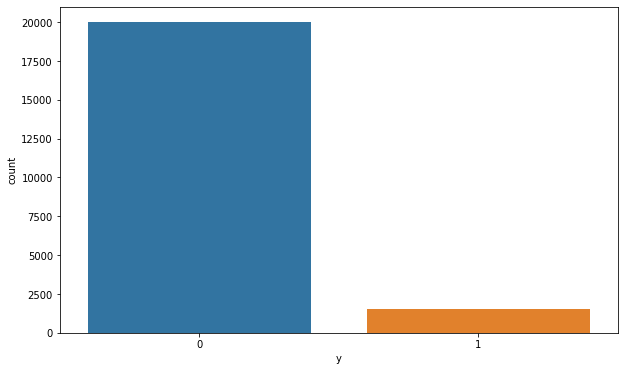

<Figure size 720x432 with 0 Axes>

In [6]:
sns.countplot(x='y',data=data)
plt.show()
plt.savefig('count_plot')

In [7]:
count_no_default = len(data[data['y']==0])
count_default = len(data[data['y']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no default is\033[1m", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default\033[1m", pct_of_default*100)

 percentage of no default is 92.79450656521135
 percentage of default 7.205493434788661


Our classes are imbalanced, and the ratio of no-default to default instances is 93:7. Before we go ahead to balance the classes, let’s do some more exploration.

Let's get a sense of the numbers across the two classes

In [8]:
data.groupby('y').mean()

,Firm ID,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
y,,,,,,
0,10002.497600,0.113131,0.103059,0.03206,0.535583,0.212753
1,20773.245976,0.217997,0.085396,0.03490,1.589981,0.199723


In [9]:
data_final=data
data_final.columns.values

array(['Firm ID', 'WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA', 'y'],
      dtype=object)

In [10]:
data_final.drop(['Firm ID'], axis=1, inplace=True)

# Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-subscription using the __SMOTE algorithm__ (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (default) instead of creating copies.

2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [11]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
y=y.astype('int')

In [12]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [13]:
# we can Check the numbers of our data
print("\033[1m length of oversampled data is" ,len(os_data_X))
print("\033[1m Number of no default in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Number of default",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("\033[1m Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

 length of oversampled data is 27996
 Number of no default in oversampled data 13998
 Number of default 13998
 Proportion of no default data in oversampled data is  0.5
 Proportion of default data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination

__Recursive Feature Elimination (RFE)__ is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())


In [15]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


In [16]:
sf_X2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfe.ranking_},)
sf_X2.sort_values(by=['Importance'])

,Feature,Importance
0,WC/TA,1
1,RE/TA,1
2,EBIT/TA,1
3,ME/TL,1
4,S/TA,1


In [17]:
cols=[]
for i in range (0, len(sf_X2["Importance"])):
    if sf_X2["Importance"][i] == 1:
        cols.append(sf_X2["Feature"][i])
print(cols)
print(len(cols))

['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']
5


The Recursive Feature Elimination (RFE) has helped us select the following features: 'WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA'.

In [18]:
X=X[cols]
y=y['y']

# Implementing the model

In [19]:
import statsmodels.api as sm
# Add a constant to the independent value
X1 = sm.add_constant(X)
logit_model=sm.Logit(y,X1)
result=logit_model.fit()
print(result.summary2())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.149154
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.424    
Dependent Variable: y                AIC:              6441.4320
Date:               2020-06-04 23:51 BIC:              6489.3016
No. Observations:   21553            Log-Likelihood:   -3214.7  
Df Model:           5                LL-Null:          -5580.6  
Df Residuals:       21547            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const       -6.1926    0.1651  -37.5035  0.0000  -6.5163  -5.8690
WC/TA        2.3290    0.1614   14.4272  0.0000   2.0126   2.6454
RE/TA   

### Logistic Regression Model Fitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the test set results and caculating the accuracy

In [21]:
y_pred = lr.predict(X_test)

In [22]:
print('Accuracy of logistic regression on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression on test set: 0.96


### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6002
           1       1.00      0.51      0.67       464

    accuracy                           0.96      6466
   macro avg       0.98      0.75      0.83      6466
weighted avg       0.97      0.96      0.96      6466



In [24]:
from sklearn import metrics
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of logistic regression model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, we got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of logistic regression model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, we can\n say, when a model makes a prediction, how often it is correct. In our prediction case, when our\n logistic regression model predicted an applicant is going to accept a credit card, that\n applicant actually accepted", "{:.2%}".format(metrics.precision_score(y_test, y_pred)) ,"of the time.")
#calculate Recall
print("\nRecall of logistic regression model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is an applicant who accepted a credit card present in the test set and our logistic\n regression can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of logistic regression model: 96.47%
Well, we got a classification rate of 96.47%

Precision of logistic regression model: 100.00%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, we can
 say, when a model makes a prediction, how often it is correct. In our prediction case, when our
 logistic regression model predicted an applicant is going to accept a credit card, that
 applicant actually accepted 100.00% of the time.

Recall of logistic regression model: 50.86%
Recall: If there is an applicant who accepted a credit card present in the test set and our logistic
 regression can identify it 50.86% of the time.


### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6002    0]
 [ 228  236]]


In [26]:
print("The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions.")
print("The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions.")
print("We have a total predictions of: ",(confusion_matrix.sum()))

The result is telling us that we have:  6238 correct predictions.
The result is telling us that we have:  228 incorrect predictions.
We have a total predictions of:  6466


# ROC Curves

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

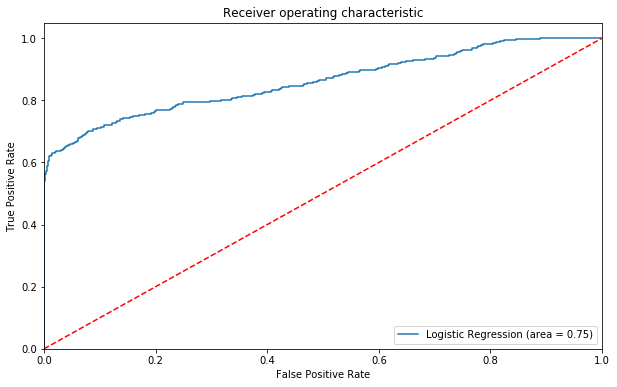

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Real-time Prediction

Finally, the best way to use this model is assigning Default Probability for each firm, create segments, and build strategies on top of that. To get the default probability from our model, utilize the code block below:

In [28]:
data['PD'] = lr.predict_proba(data[X_train.columns])[:,1]
data[['PD']].head(10)

,PD
0,0.128574
1,0.187837
2,0.084148
3,0.017649
4,0.079290
5,0.304481
6,0.004328
7,0.003877
8,0.013894
9,0.007499


In [29]:
data.to_csv('PD.csv', encoding='utf-8')